# Linear Sequential Estimation

In [19]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import statsmodels.api as sm

np.random.seed(1)

In [20]:
import sys
import requests
import importlib

def import_local_or_github(package_name, function_name=None, directory=None, giturl=None):
    # Import functions directly from github
    # Important: note that we use raw.githubusercontent.com, not github.com

    try: # to find the file locally
        if directory is not None:
            if directory not in sys.path:
                sys.path.append(directory)

        package = importlib.import_module(package_name)
        if function_name is not None:
            function = getattr(package, function_name)
            return function
        else:
            return package

    except: # get the file from github
        if giturl is None:
            giturl = 'https://raw.githubusercontent.com/florisvb/Nonlinear_and_Data_Driven_Estimation/main/Utility/' + str(package_name) + '.py'

        r = requests.get(giturl)
        print('Fetching from: ')
        print(r)

        # Store the file to the colab working directory
        with open(package_name+'.py', 'w') as f:
            f.write(r.text)
        f.close()

        # import the function we want from that file
        package = importlib.import_module(package_name)
        if function_name is not None:
            function = getattr(package , function_name)
            return function
        else:
            return package

plot_tme = import_local_or_github('plot_utility', 'plot_tme', directory='../Utility')

Fetching from: 
<Response [200]>


# Generate sample time series data

In [21]:
t = np.linspace(0, 6, 500)
x = np.array([[1, 1, 2, -0.4e-4]]).T
H = np.vstack([t, np.sin(t), np.cos(2*t), np.exp(t)]).T
y = H@x

# Add some normal (gaussian) noise

In [22]:
# Example for Gaussian (normal) random variable

noise_mean = 0
noise_std = 0.5

v = np.column_stack(np.random.normal(noise_mean, noise_std, len(y))).T

In [23]:
y_tilde = y+v

# Plotting

<Axes: xlabel='Time', ylabel='y'>

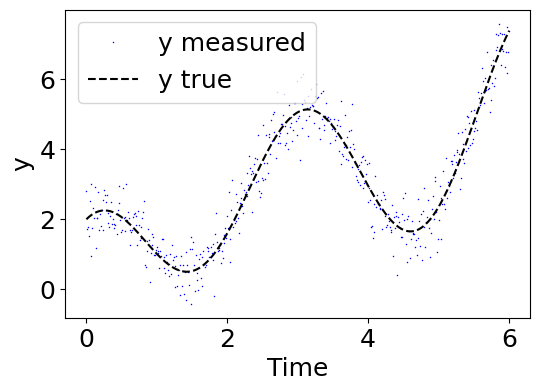

In [24]:
plot_tme(t, y, y_tilde)

# Candidate models

In [25]:
model_1_H = np.vstack([t, np.sin(t), np.cos(2*t)]).T

# Exercise

Implement Linear Sequential Estimation, and plot the three parameters of $x$ over time.
  * Assume all measurements are equally trustworth (W=1)
  * Incorporate a single measurement at a time
  * You will need to initialize with some initial value of $\hat{x}$ and $P$. Try a random set of three values for $\hat{x}$, and the $10I$ (10x the identity matrix) for P.

Hint, try writing an update equation that has the following form:



```
def update(x_k, P_k, H_kp1, y_kp1):
    # your code here
    return x_kp1, P_kp1
```



# Solution

In [45]:
x0 = np.array([[0,0,0]]).T
P0 = 10*np.eye(3)

In [46]:
def update(x_k, P_k, H_kp1, y_kp1, W):
    inv_P_k = np.linalg.inv(P_k)
    inv_P_kp1 = inv_P_k + H_kp1.T@W@H_kp1
    P_kp1 = np.linalg.inv(inv_P_kp1)
    x_kp1 = x_k + P_kp1@H_kp1.T@W@(y_kp1-H_kp1@x_k)
    return x_kp1, P_kp1

In [47]:
np.atleast_2d(y_tilde[5,:])

array([[0.95495208]])

In [48]:
np.atleast_2d(model_1_H[5,:])

array([[0.06012024, 0.06008403, 0.99277982]])

In [49]:
x_hats = [x0]
Ps = [P0]

for i in range(y_tilde.shape[0]):
  x_k = x_hats[-1]
  P_k = Ps[-1]
  H_kp1 = np.atleast_2d(model_1_H[i,:])
  y_kp1 = np.atleast_2d(y_tilde[i,:])
  W = np.array([[1]])
  x_kp1, P_kp1 = update(x_k, P_k, H_kp1, y_kp1, W)
  x_hats.append(x_kp1)
  Ps.append(P_kp1)

In [54]:
X = np.hstack(x_hats)

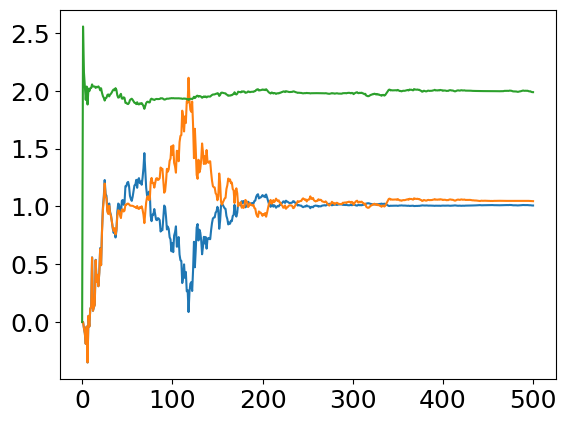

In [56]:
plt.plot(X[0,:])
plt.plot(X[1,:])
plt.plot(X[2,:])